<font color="#CA3532"><h1 align="left">Biclustering</h1></font>
<font color="#6E6E6E"><h2 align="left">Wines dataset</h2></font>

In [1]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load

Now we will use clustering in a wine database. The goal is to check if the clustering discovers the different real wine types.

The database describes the parameters of different wine instances. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [3]:
if COLAB:
  !mkdir datasets
  aux = "'https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t'"
  !wget $aux -O ./datasets/wine_dataset.csv

--2023-11-04 12:25:29--  https://docs.google.com/uc?export=download&id=1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR&confirm=t
Resolving docs.google.com (docs.google.com)... 173.194.213.102, 173.194.213.139, 173.194.213.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.213.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e8fvur49oe7ulmq5418gd1d5ou6ophdh/1699100700000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=1461df9e-6477-4a35-a8fd-d74f4d08afa4 [following]
--2023-11-04 12:25:29--  https://doc-0k-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e8fvur49oe7ulmq5418gd1d5ou6ophdh/1699100700000/17112108692206476645/*/1qigIIUsO-VOrXQtjoonZXIxDuVO9eJiR?e=download&uuid=1461df9e-6477-4a35-a8fd-d74f4d08afa4
Resolving doc-0k-8k-docs.googleusercontent.com (doc-0k-8k-docs.googleusercontent.com)... 173.194.216.

In [4]:
data = pd.read_csv('datasets/wine_dataset.csv', delimiter=';', header=0)
np.random.seed(5)

print('\033[1m' + 'Wine Database\n', '\033[0m')
print('Number of real classes (wine types): %d' % np.unique(data['Type']).shape[0])
print('Unique class labels:', np.unique(data['Type']))
print('\nFirst 5 instances:\n')
data.sample(5)

Wine Database
 
Number of real classes (wine types): 3
Unique class labels: ['A' 'B' 'C']

First 5 instances:



,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
28,A,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.5,1.25,3.40,915
66,B,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
17,A,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.6,1.13,2.57,1130
138,C,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.7,0.81,1.82,580


## Data Description

In [5]:
data.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
Alcohol,178.0,11.03,14.83,13.000618,0.811827
Malic_Acid,178.0,0.74,5.80,2.336348,1.117146
Ash,178.0,1.36,3.23,2.366517,0.274344
Ash_Alcalinity,178.0,10.60,30.00,19.494944,3.339564
Magnesium,178.0,70.00,162.00,99.741573,14.282484
Total_Phenols,178.0,0.98,3.88,2.295112,0.625851
Flavanoids,178.0,0.34,5.08,2.029270,0.998859
Nonflavanoid_Phenols,178.0,0.13,0.66,0.361854,0.124453
Proanthocyanins,178.0,0.41,3.58,1.590899,0.572359
Color_Intensity,178.0,1.28,13.00,5.058090,2.318286


## Data Exploration

In [6]:
class_name = 'Type'

unique_classes = data[class_name].unique()
class_value = data.pop(class_name)
attribute_names = np.array(data.columns)

print(class_name)
print(unique_classes)
print(attribute_names)

Type
['A' 'B' 'C']
['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcalinity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280_OD315' 'Proline']


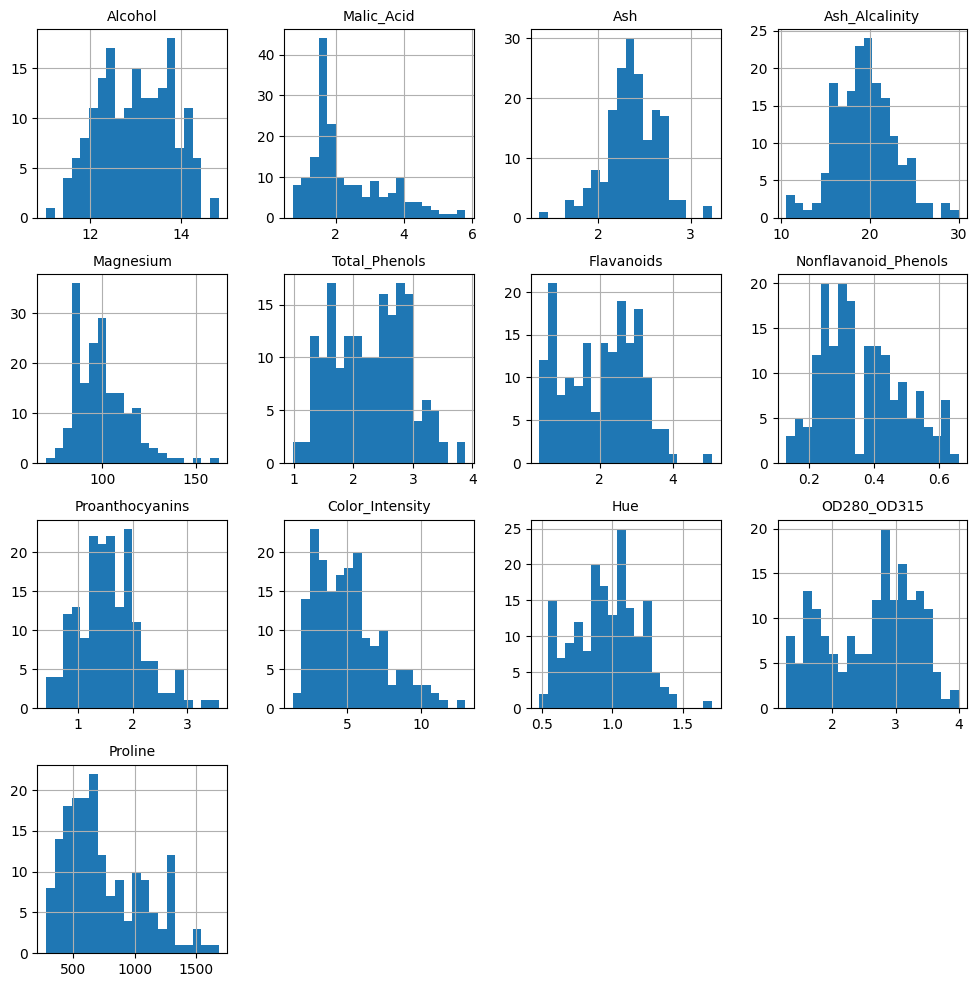

In [7]:
if True:
    fontsize = 10
    fig = data[attribute_names].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_names)):
        name = attribute_names[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)

# Biclustering

Basic preprocessing: standarization

In [8]:
from sklearn.preprocessing import StandardScaler

clean_data = data[attribute_names].copy()

y = np.array(class_value)
X = np.array(clean_data[attribute_names])
X_std = StandardScaler().fit_transform(X)
pd.DataFrame(X_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [9]:
# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


In [10]:
print(attribute_names)

['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcalinity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280_OD315' 'Proline']


Now we perform biclustering

In [11]:
df_std = pd.DataFrame(X_std, columns=attribute_names)
# si binarizamos (True si es mayor que cero, False en caso contrario):
#df_std = pd.DataFrame((X_std>0).astype(int), columns=attribute_names)

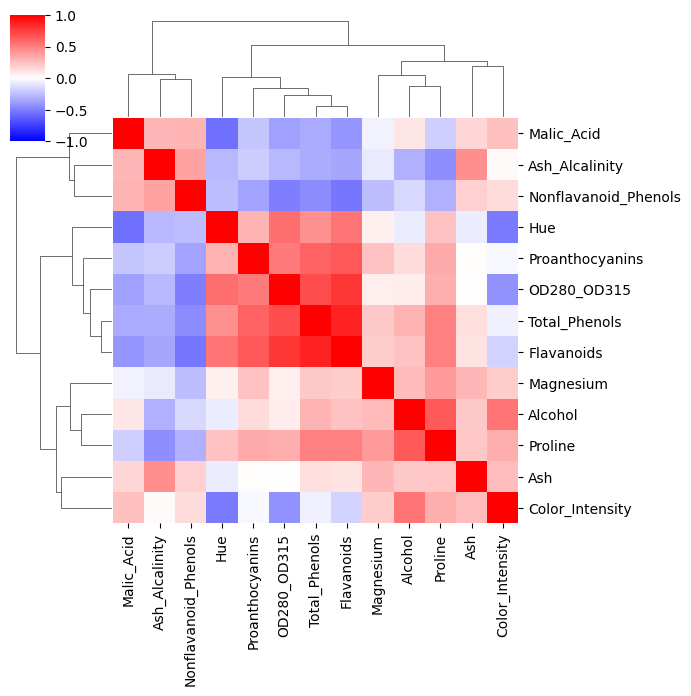

In [12]:
cmap = plt.cm.bwr

sns.clustermap(df_std.corr(), cmap=cmap, vmin=-1, vmax=1, figsize=(7,7));

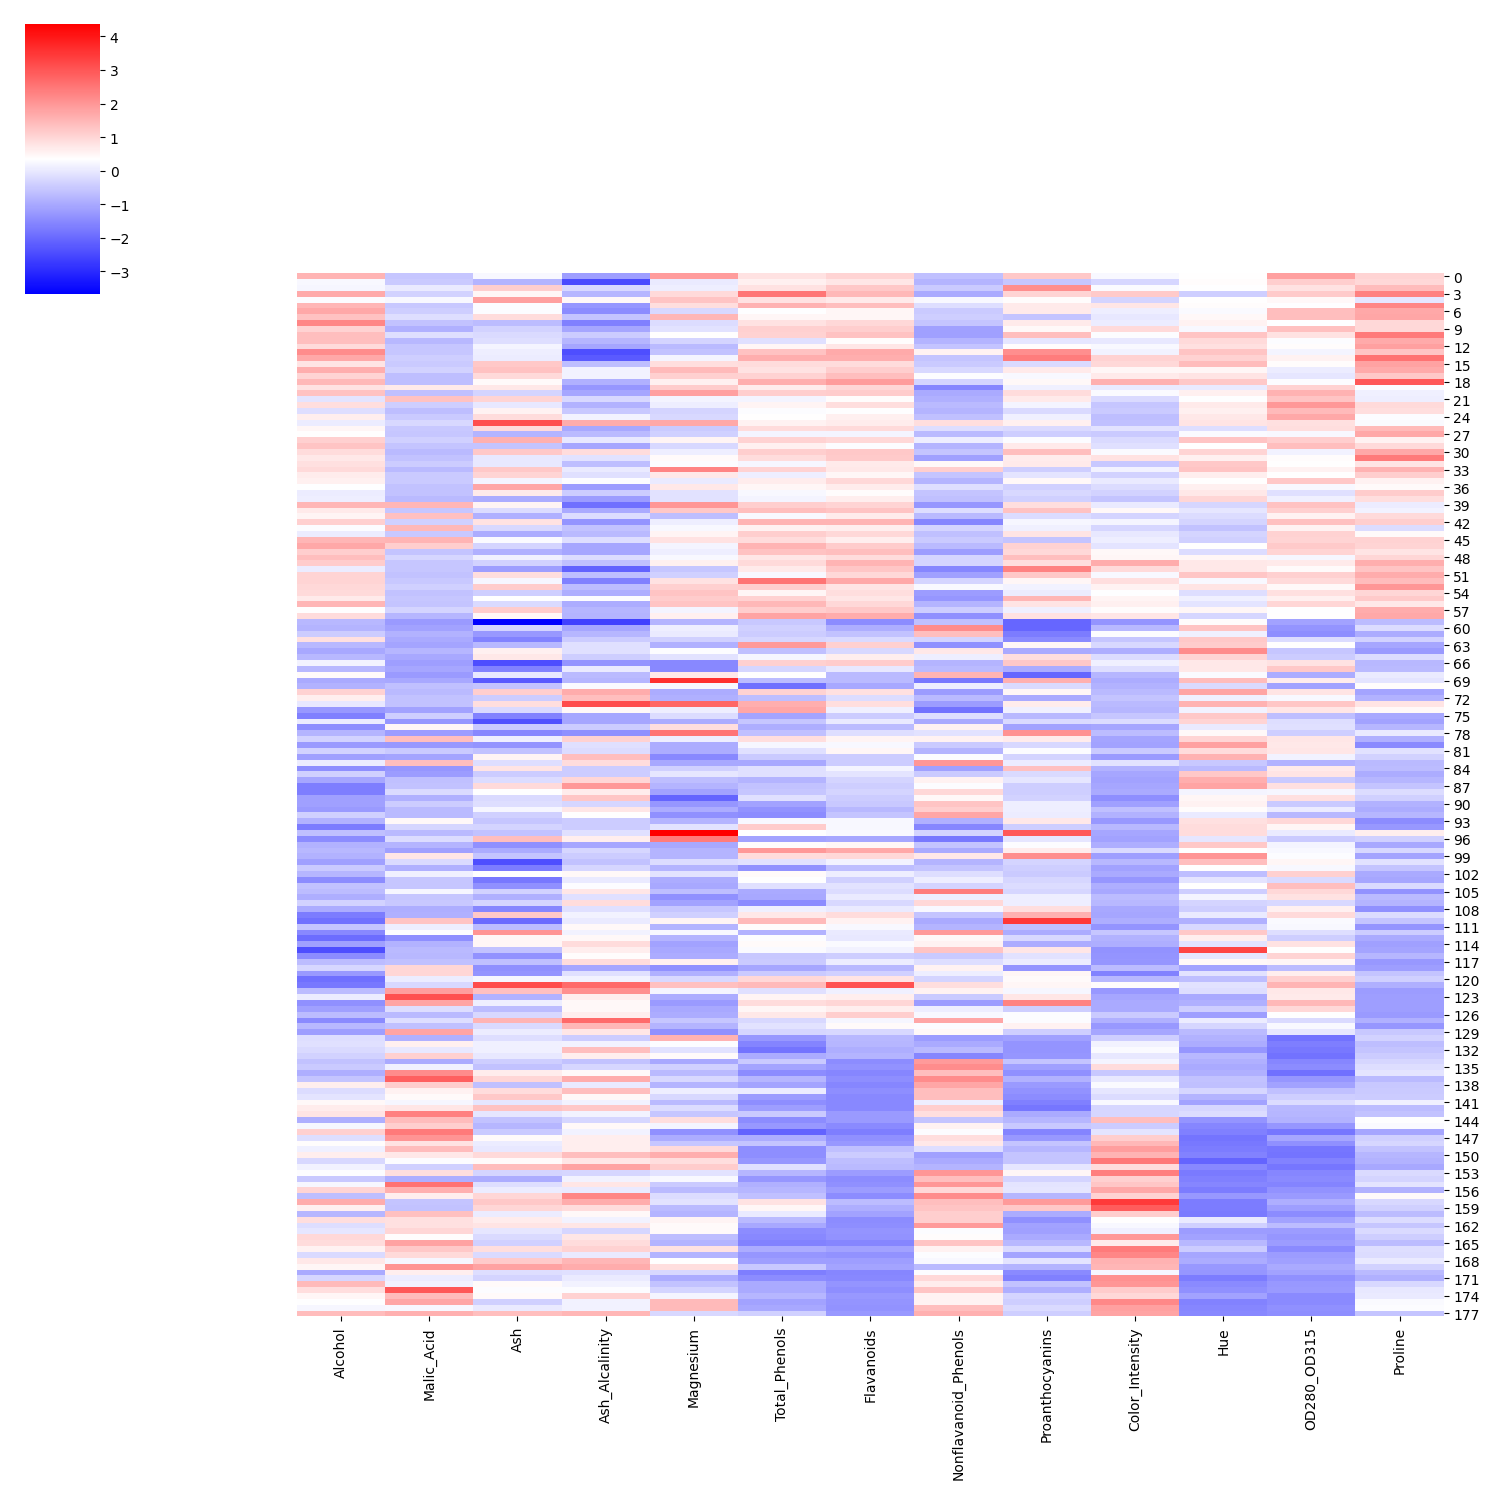

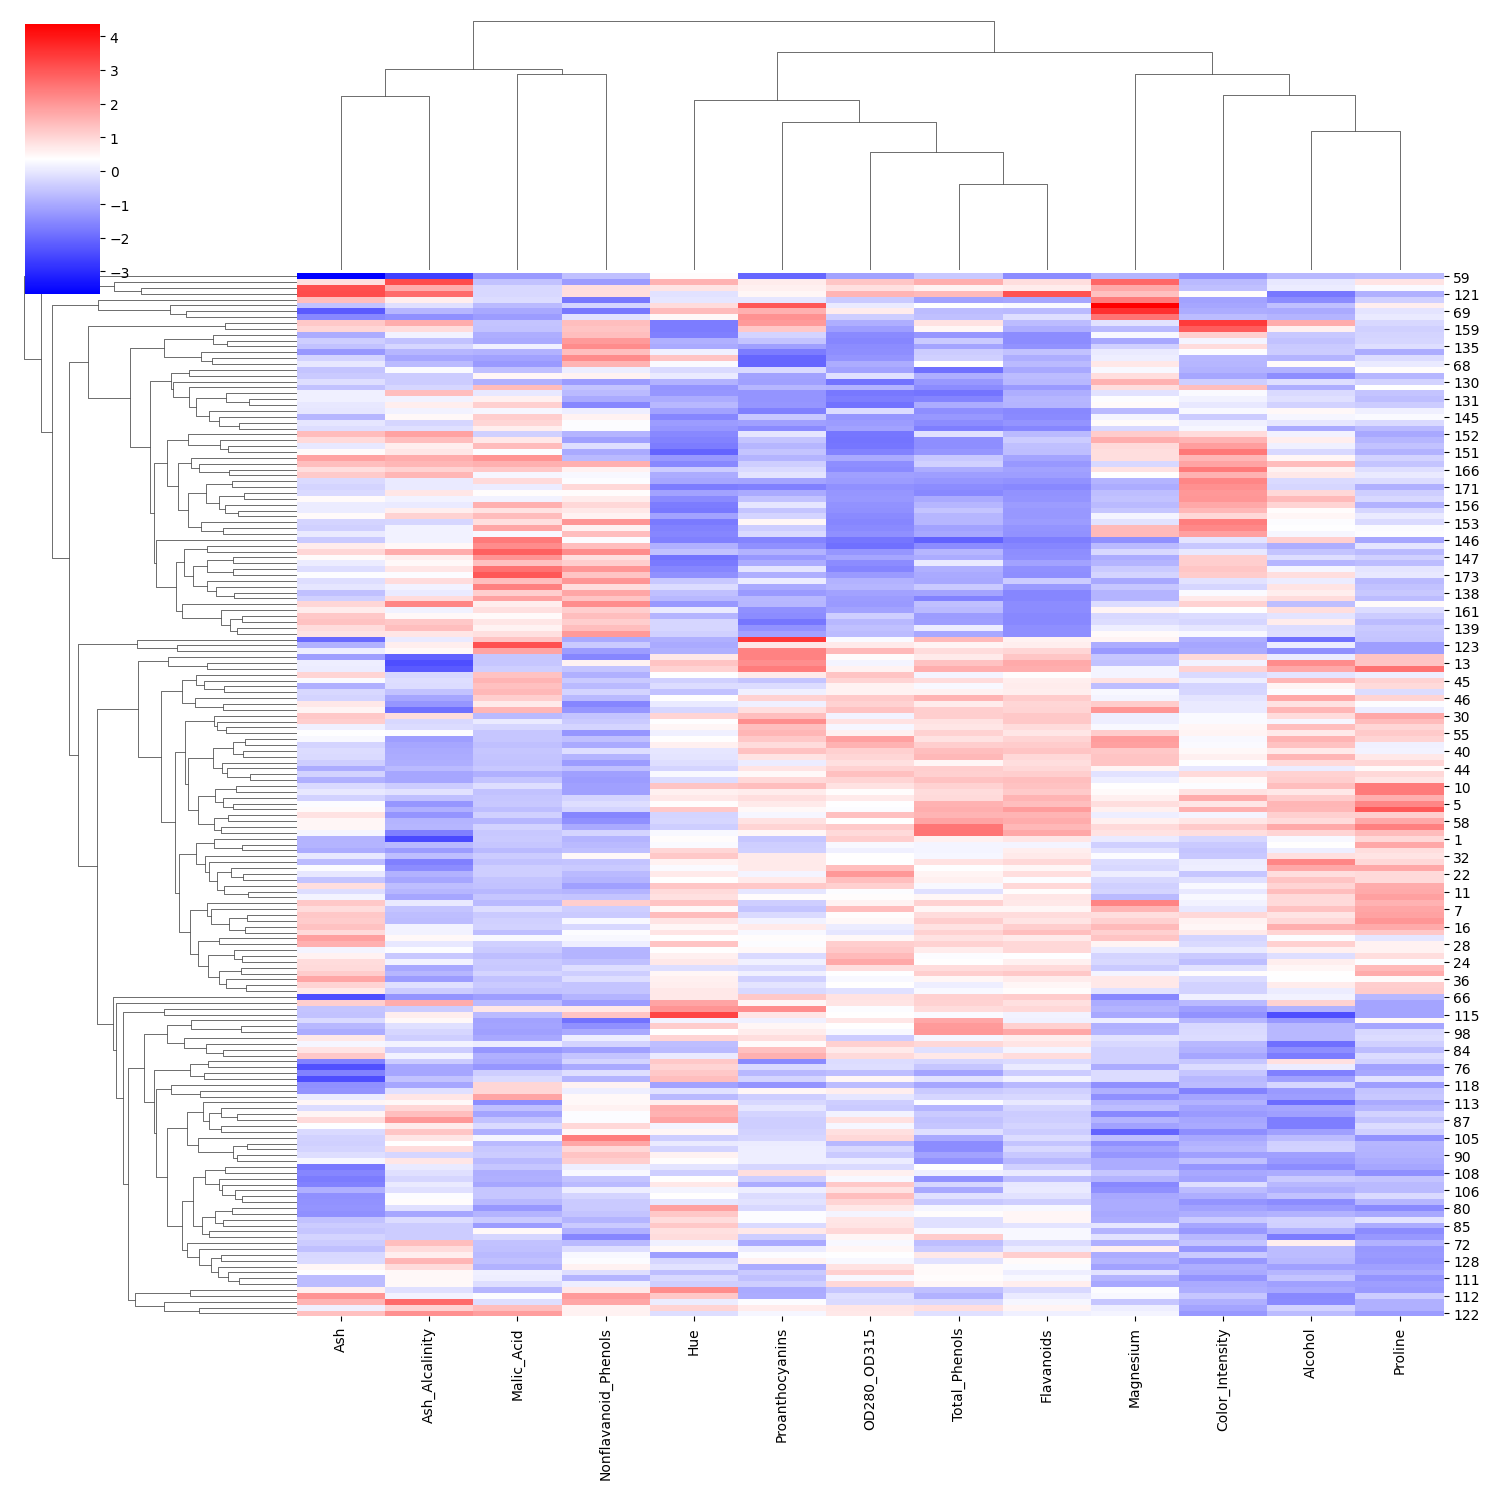

In [13]:
sns.clustermap(df_std, figsize=(15,15),
               row_cluster=False, col_cluster=False, #metric='correlation',
               cmap=cmap)
plt.show()

sns.clustermap(df_std, figsize=(15,15), #metric='correlation',
               cmap=cmap);

In [14]:
unique_classes

array(['A', 'B', 'C'], dtype=object)

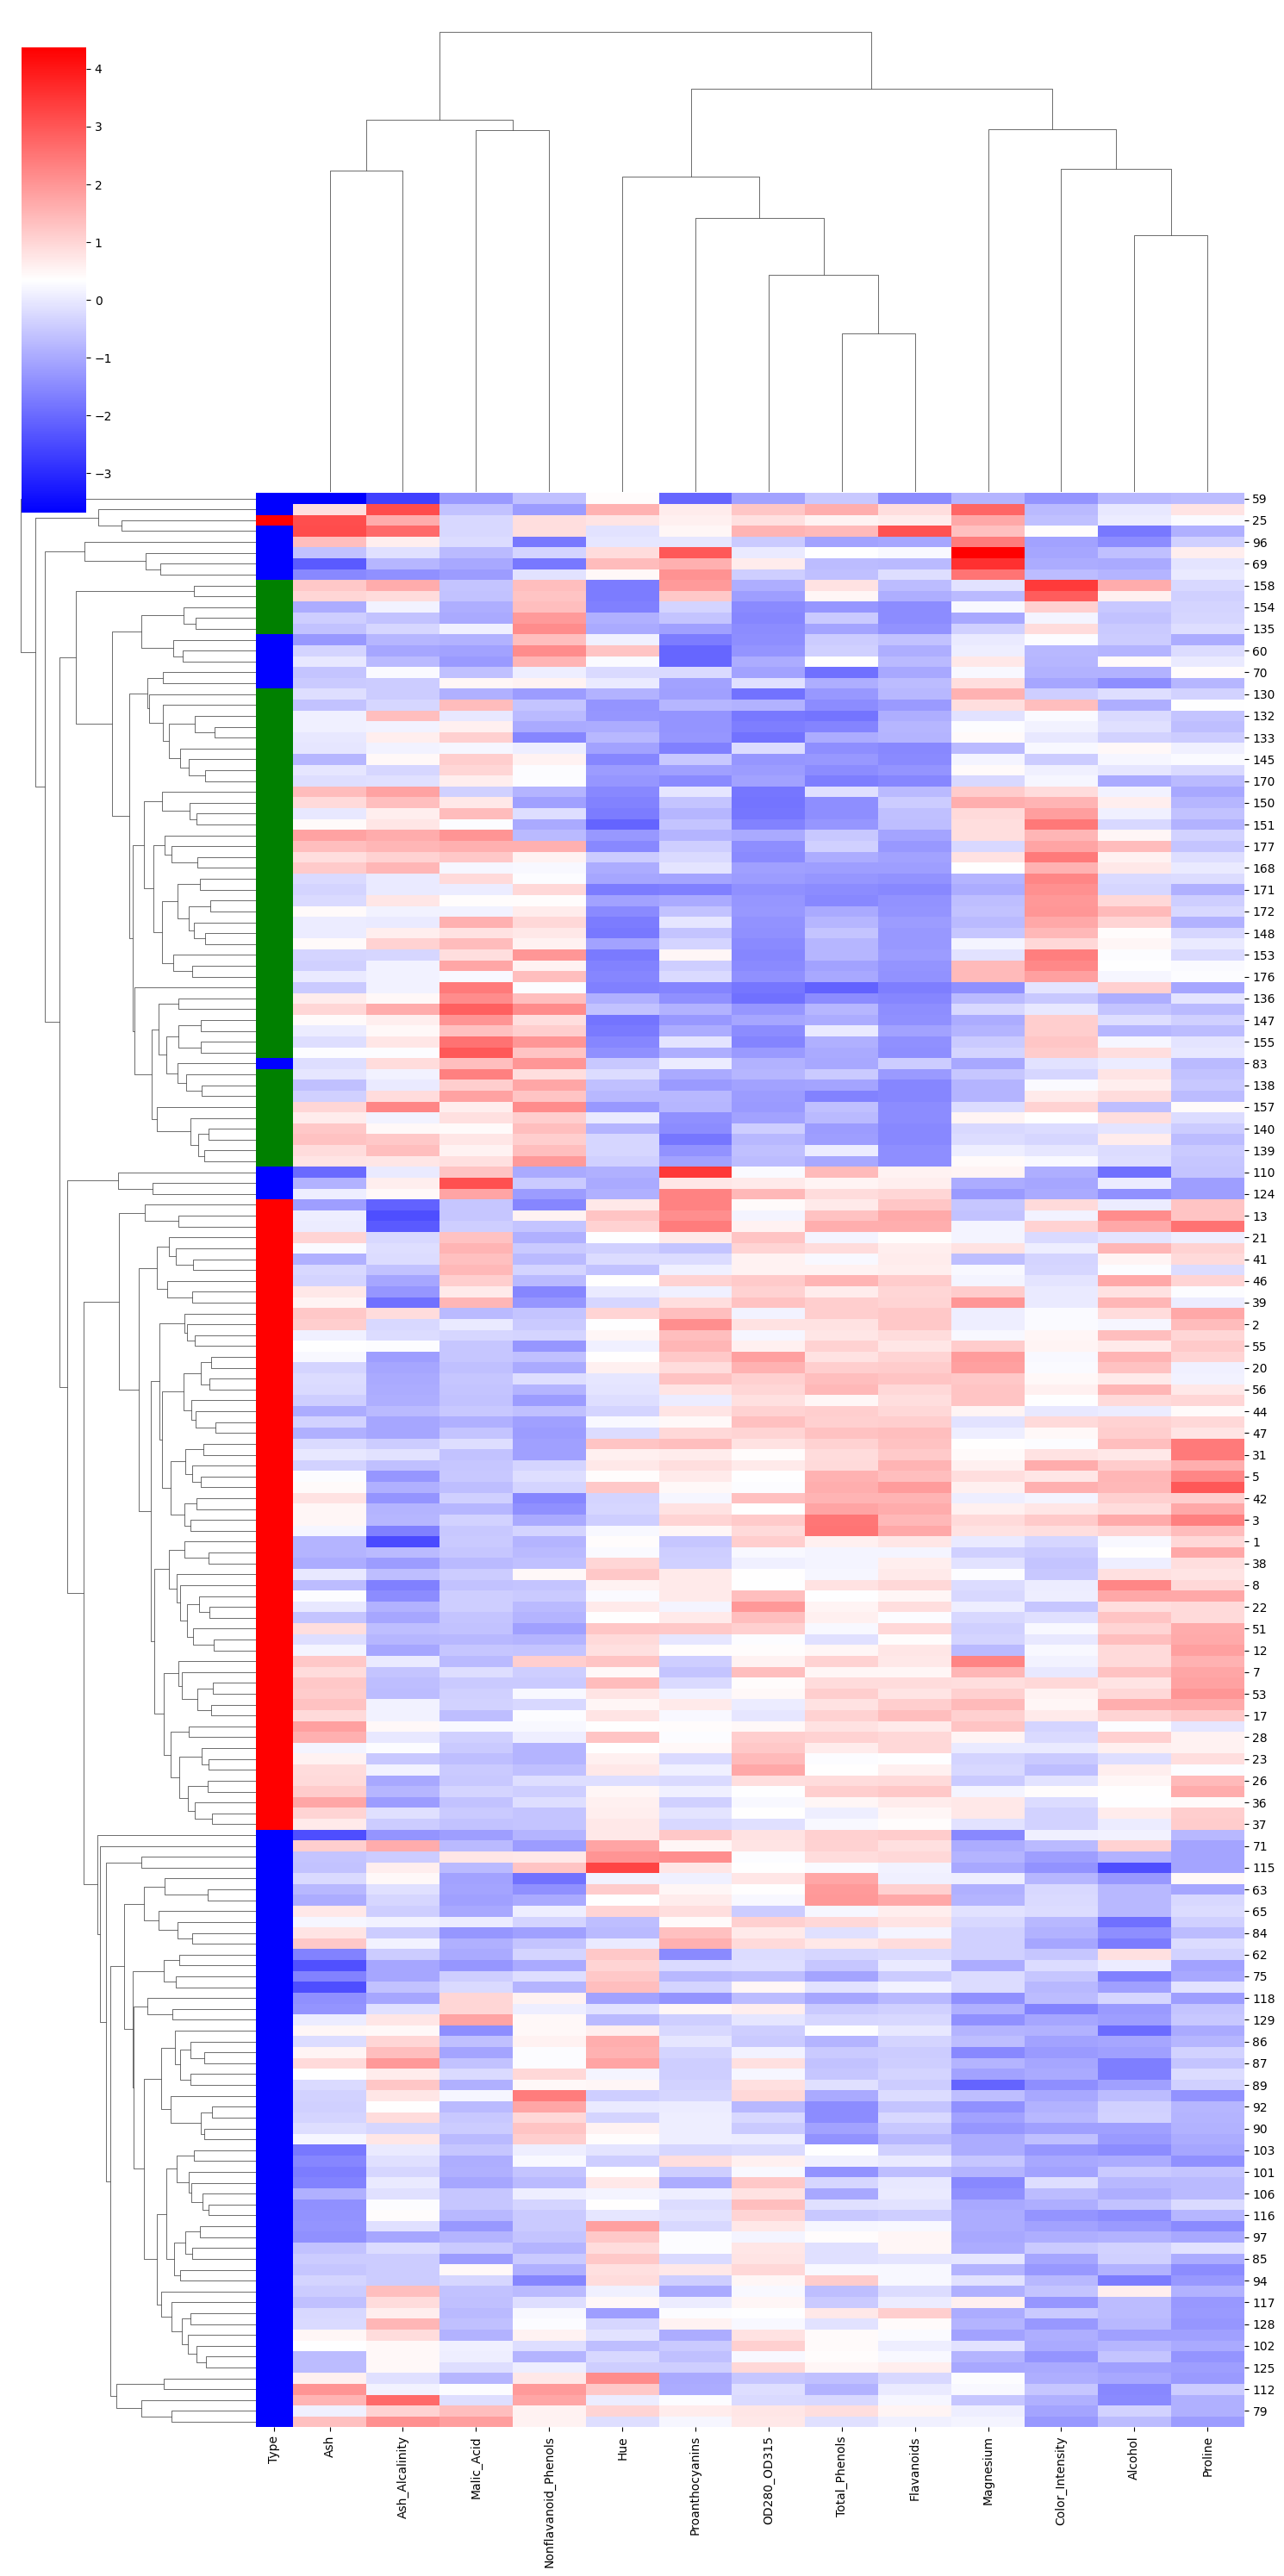

In [15]:
lut = dict(zip(unique_classes, "rbg"))
row_colors = class_value.map(lut)
g = sns.clustermap(df_std, row_colors=row_colors, cmap=cmap, #metric="correlation"
                   figsize=(15,30))

In [28]:
from sklearn.cluster import SpectralCoclustering, SpectralBiclustering

#tipo_modelo = "biclustering"
tipo_modelo = "coclustering"

rows = list(range(len(df_std)))
cols = attribute_names

#cmap = plt.cm.Blues
cmap = plt.cm.bwr

if tipo_modelo == "biclustering":
    model = SpectralBiclustering(n_clusters=(3,3), random_state=0)
else:
    model = SpectralCoclustering(n_clusters=3, random_state=0)

model.fit(df_std)

SpectralCoclustering(random_state=0)

In [29]:
n_clusters = model.n_clusters

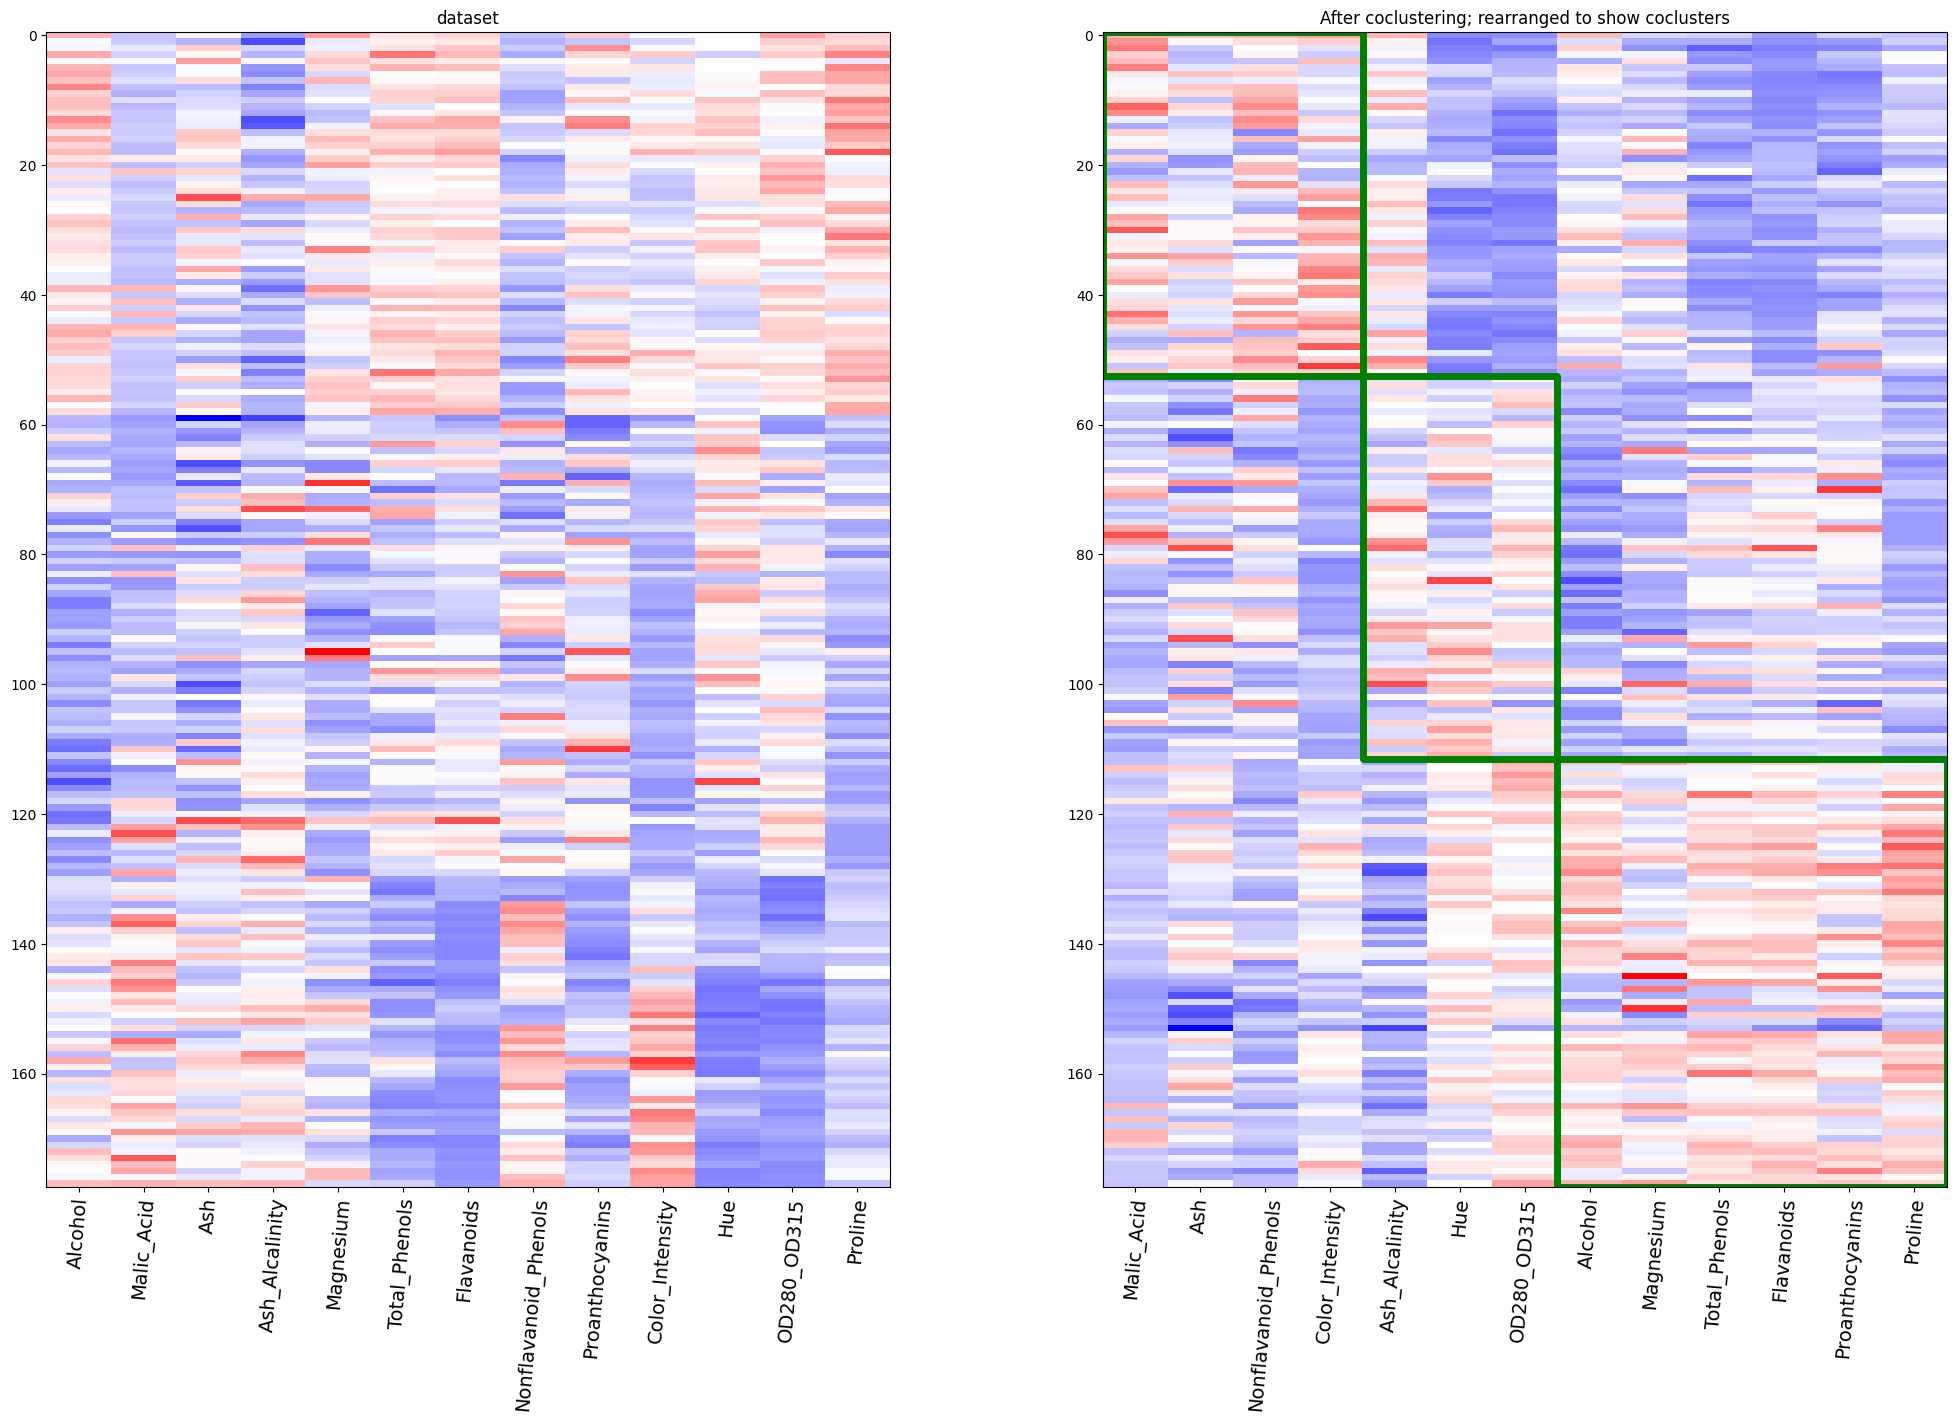

In [30]:
sorted_rows_inds = np.argsort(model.row_labels_)
sorted_cols_inds = np.argsort(model.column_labels_)

fit_data = df_std.iloc[sorted_rows_inds, sorted_cols_inds]

plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
plt.imshow(df_std, cmap=cmap, aspect=0.1)
plt.xticks(range(len(attribute_names)), attribute_names,
           fontsize=14, rotation=85)
plt.title("dataset")

plt.subplot(1,2,2)
plt.imshow(fit_data, cmap=cmap, aspect=0.1)
plt.xticks(range(len(attribute_names)), attribute_names[sorted_cols_inds],
           fontsize=14, rotation=85)

if tipo_modelo == "biclustering":
    plt.title("After biclustering; rearranged to show biclusters")
else:
    plt.title("After coclustering; rearranged to show coclusters")

corner_y = -0.5
for i in range(n_clusters):
    corner_x = -0.5
    for j in range(n_clusters):
        sh = [model.get_shape(i)[0], model.get_shape(j)[1]]

        if (tipo_modelo == "coclustering") and (i!=j):
            corner_x += sh[1]
            continue

        plt.plot([corner_x, corner_x+sh[1], corner_x+sh[1], corner_x, corner_x],
                 [corner_y, corner_y, corner_y+sh[0], corner_y+sh[0], corner_y], 'g', linewidth=5)
        corner_x += sh[1]
    corner_y += sh[0]

#### Los mismos gráficos pero girados:

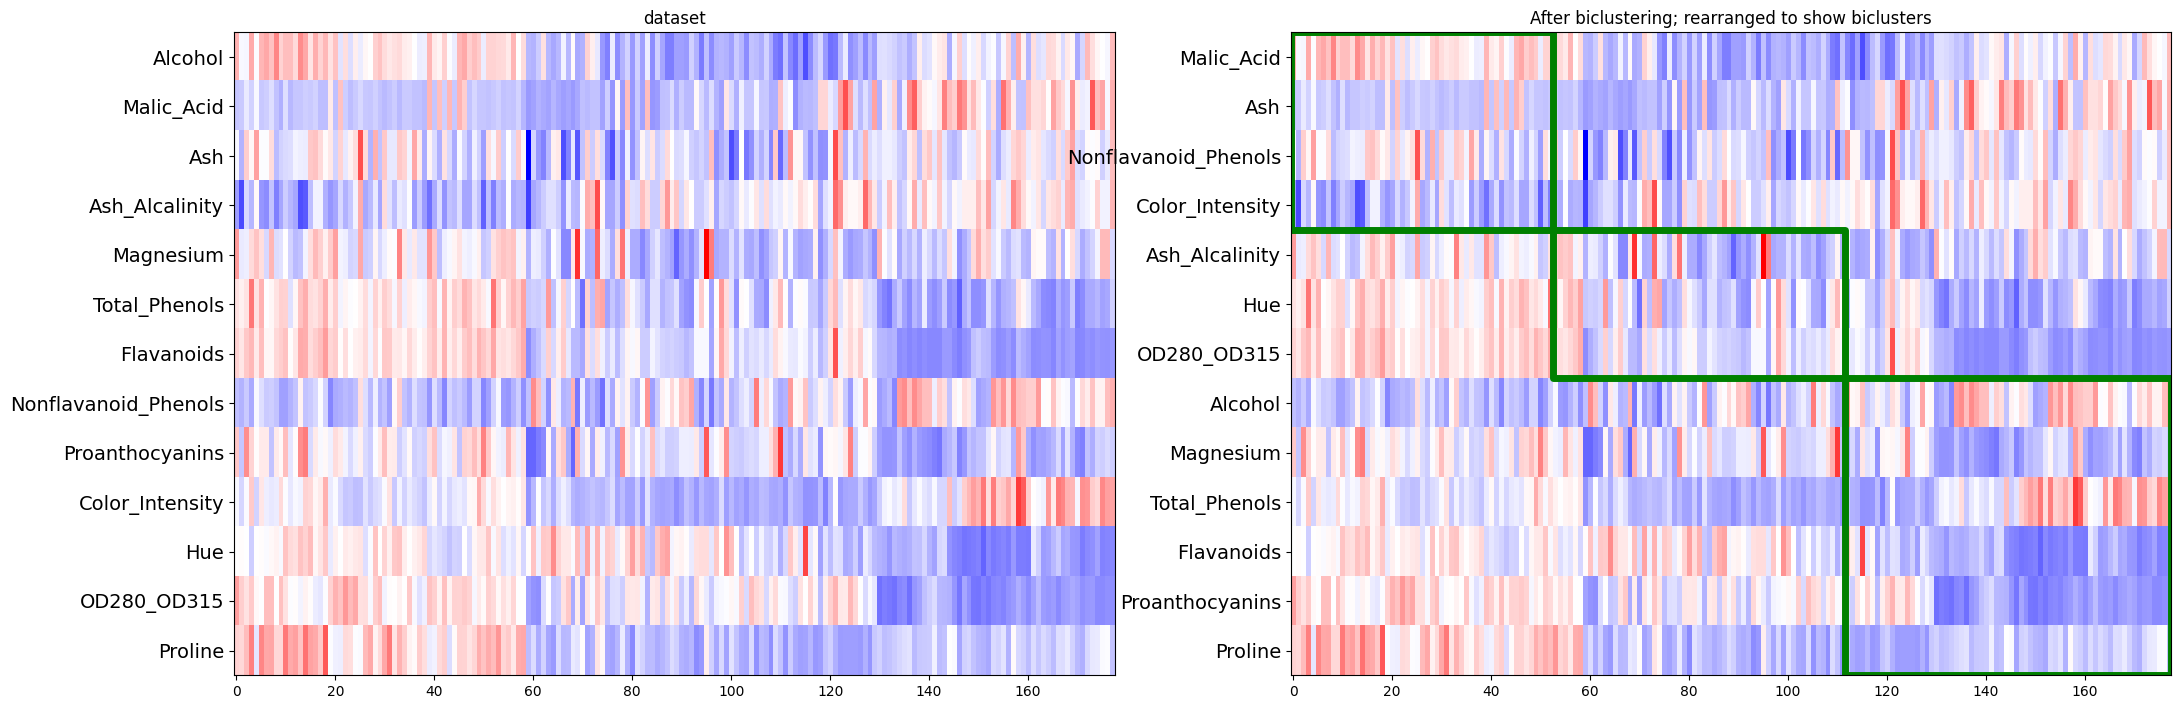

In [31]:
plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
plt.imshow(df_std.T, cmap=cmap, aspect=10)
plt.yticks(range(len(attribute_names)), attribute_names, fontsize=14)
plt.title("dataset")

#plt.figure(figsize=(20,15))
plt.subplot(1,2,2)
plt.imshow(df_std.T, cmap=cmap, aspect=10)
plt.yticks(range(len(attribute_names)), attribute_names[sorted_cols_inds], fontsize=14)
plt.title("After biclustering; rearranged to show biclusters")

corner_x = -0.5
for i in range(model.n_clusters):
    corner_y = -0.5
    for j in range(model.n_clusters):
        sh = [model.get_shape(i)[0], model.get_shape(j)[1]]

        if (tipo_modelo == "coclustering") and (i!=j):
            corner_y += sh[1]
            continue

        plt.plot([corner_x, corner_x+sh[0], corner_x+sh[0], corner_x, corner_x],
                 [corner_y, corner_y, corner_y+sh[1], corner_y+sh[1], corner_y], 'g', linewidth=5)
        corner_y += sh[1]
    corner_x += sh[0]

In [32]:
model.row_labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [33]:
model.column_labels_

array([2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2], dtype=int32)

In [34]:
model.get_indices(1)

(array([  4,  25,  60,  63,  64,  65,  67,  71,  72,  73,  75,  77,  79,
         80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129]),
 array([ 3, 10, 11]))

In [35]:
#print(model.row_labels_)
#print(model.column_labels_)

unique_labels = np.unique(model.row_labels_)
print(unique_labels)

for i in unique_labels:
    inds = (np.where(model.row_labels_ == i))[0]
    print('\033[1m'+'- Cluster %d' % i + '\033[0m')
    print('  %g%% of total patterns' % (100*len(inds)/len(model.row_labels_)))
    for real_class in unique_classes:
        print('  Number of patterns with real class %c: %d' % (real_class, (list(y[inds])).count(real_class)))
    print()

[0 1 2]
- Cluster 0
  29.7753% of total patterns
  Number of patterns with real class A: 0
  Number of patterns with real class B: 5
  Number of patterns with real class C: 48

- Cluster 1
  33.1461% of total patterns
  Number of patterns with real class A: 2
  Number of patterns with real class B: 57
  Number of patterns with real class C: 0

- Cluster 2
  37.0787% of total patterns
  Number of patterns with real class A: 57
  Number of patterns with real class B: 9
  Number of patterns with real class C: 0

